In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [2]:
work_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_v4.1_Zfix_noburst_bc03MILES_100k/'
par_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_001_physpar_wagef.fits'


In [3]:
hdul_par=fits.open(par_file)

age10=hdul_par[1].data['age10']
age25=hdul_par[1].data['age25']
age50=hdul_par[1].data['age50']
age75=hdul_par[1].data['age75']
age90=hdul_par[1].data['age90']

n_chunks=5
for i_chunks in range(2, n_chunks+1):
    _par_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_{:03d}_physpar_wagef.fits'
    _hdul_par=fits.open(_par_file.format(i_chunks))

    _age10=_hdul_par[1].data['age10']
    _age25=_hdul_par[1].data['age25']
    _age50=_hdul_par[1].data['age50']
    _age75=_hdul_par[1].data['age75']
    _age90=_hdul_par[1].data['age90']
    
    age10=np.append(age10, _age10)
    age25=np.append(age25, _age25)
    age50=np.append(age50, _age50)
    age75=np.append(age75, _age75)
    age90=np.append(age90, _age90)    
    

In [4]:
bins=30
bin_age50=np.histogram(np.log10(age50), bins=bins, range=(8.65, 10.15))[1]
age50_binned=[0.0]*bins
for i in range(0, bins):
    age50_binned[i]=(bin_age50[i]+bin_age50[i+1])/2.0
    

In [5]:
z32=-1.69897
z42=-0.69897
z52=-0.39794
z62=0.0
z72=0.39794
Z=[z32,z42,z52,z62,z72]
bin_z=np.histogram(Z, bins=5)[1]
x,y=np.meshgrid(bin_age50, bin_z)

Text(0.5, 1.0, 'time resolution SNR100 (d1090n50) col')

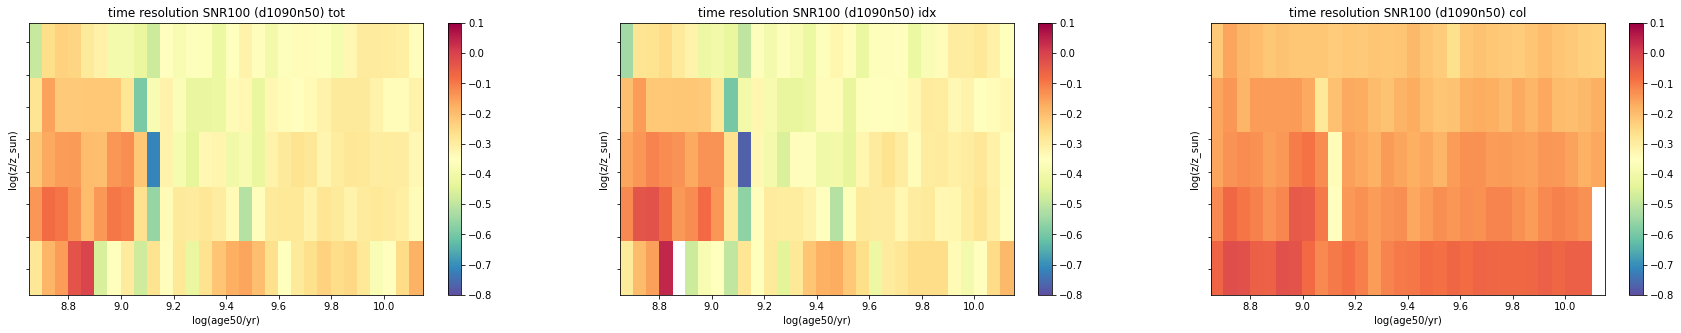

In [6]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR100_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot100=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot100=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot100=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot100=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot100=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR100_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx100=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx100=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx100=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx100=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx100=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR100_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col100=table_t_res_col['Log_d1090n50_min_z32']
t_42_col100=table_t_res_col['Log_d1090n50_min_z42']
t_52_col100=table_t_res_col['Log_d1090n50_min_z52']
t_62_col100=table_t_res_col['Log_d1090n50_min_z62']
t_72_col100=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot100, t_42_tot100, t_52_tot100, t_62_tot100, t_72_tot100],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx100, t_42_idx100, t_52_idx100, t_62_idx100, t_72_idx100],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col100, t_42_col100, t_52_col100, t_62_col100, t_72_col100],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im,ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR100 (d1090n50) tot')
ax[1].set_title('time resolution SNR100 (d1090n50) idx')
ax[2].set_title('time resolution SNR100 (d1090n50) col')


Text(0.5, 1.0, 'time resolution SNR50 (d1090n50) col')

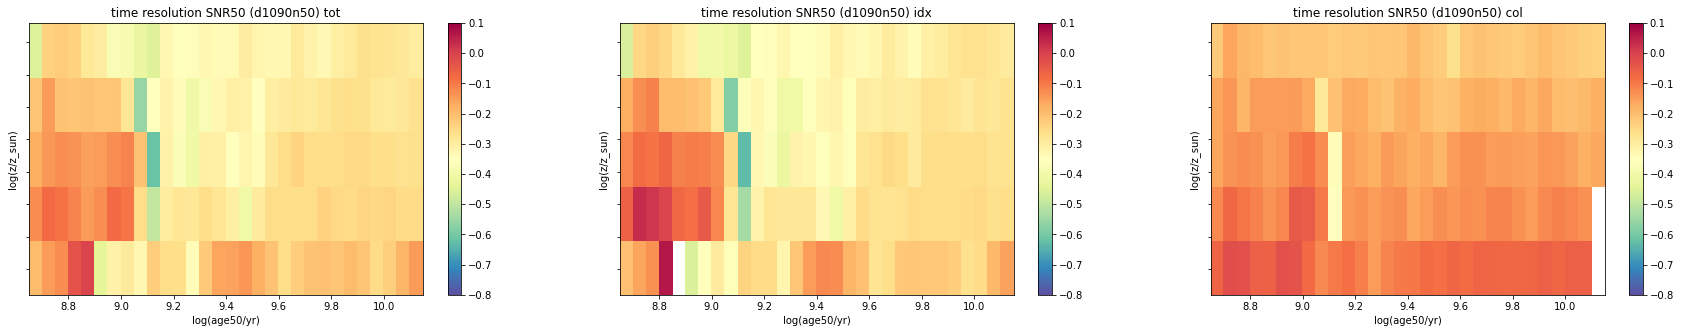

In [7]:
time_res_file_tot=work_dir+'Time_resol_Zfix_SNR50_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot50=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot50=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot50=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot50=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot50=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_SNR50_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx50=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx50=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx50=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx50=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx50=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_SNR50_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col50=table_t_res_col['Log_d1090n50_min_z32']
t_42_col50=table_t_res_col['Log_d1090n50_min_z42']
t_52_col50=table_t_res_col['Log_d1090n50_min_z52']
t_62_col50=table_t_res_col['Log_d1090n50_min_z62']
t_72_col50=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot50, t_42_tot50, t_52_tot50, t_62_tot50, t_72_tot50],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx50, t_42_idx50, t_52_idx50, t_62_idx50, t_72_idx50],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col50, t_42_col50, t_52_col50, t_62_col50, t_72_col50],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im, ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR50 (d1090n50) tot')
ax[1].set_title('time resolution SNR50 (d1090n50) idx')
ax[2].set_title('time resolution SNR50 (d1090n50) col')


Text(0.5, 1.0, 'time resolution SNR20 (d1090n50) col')

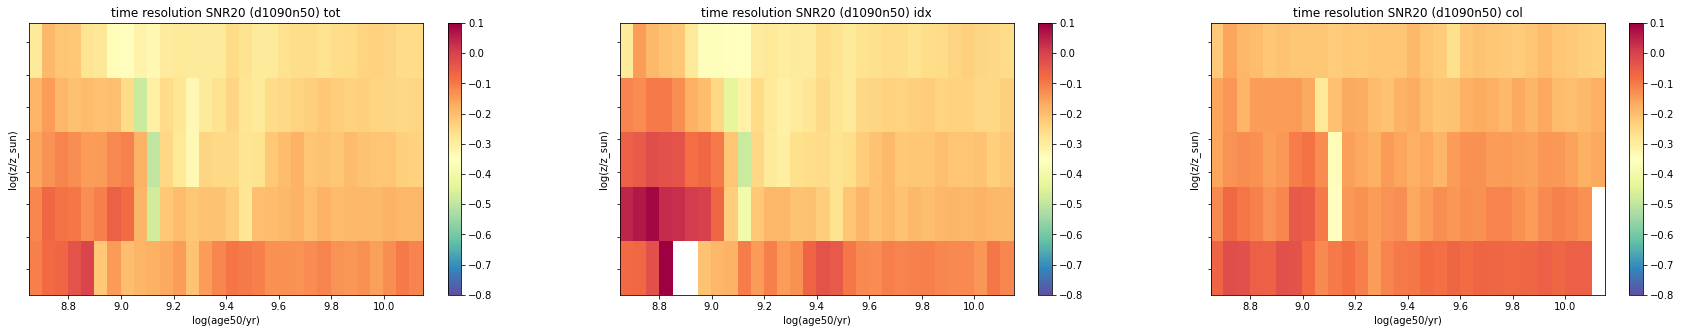

In [8]:
time_res_file_tot=work_dir+'Time_resol_Zfix_tot.fits'
list_t_tot=fits.open(time_res_file_tot)

table_t_res_tot=(list_t_tot[1].data)

t_32_tot=table_t_res_tot['Log_d1090n50_min_z32']
t_42_tot=table_t_res_tot['Log_d1090n50_min_z42']
t_52_tot=table_t_res_tot['Log_d1090n50_min_z52']
t_62_tot=table_t_res_tot['Log_d1090n50_min_z62']
t_72_tot=table_t_res_tot['Log_d1090n50_min_z72']

time_res_file_idx=work_dir+'Time_resol_Zfix_idx.fits'
list_t_idx=fits.open(time_res_file_idx)

table_t_res_idx=(list_t_idx[1].data)

t_32_idx=table_t_res_idx['Log_d1090n50_min_z32']
t_42_idx=table_t_res_idx['Log_d1090n50_min_z42']
t_52_idx=table_t_res_idx['Log_d1090n50_min_z52']
t_62_idx=table_t_res_idx['Log_d1090n50_min_z62']
t_72_idx=table_t_res_idx['Log_d1090n50_min_z72']

time_res_file_col=work_dir+'Time_resol_Zfix_col.fits'
list_t_col=fits.open(time_res_file_col)

table_t_res_col=(list_t_col[1].data)

t_32_col=table_t_res_col['Log_d1090n50_min_z32']
t_42_col=table_t_res_col['Log_d1090n50_min_z42']
t_52_col=table_t_res_col['Log_d1090n50_min_z52']
t_62_col=table_t_res_col['Log_d1090n50_min_z62']
t_72_col=table_t_res_col['Log_d1090n50_min_z72']

fig, ax=plt.subplots(1,3,figsize=(30,5))
ax[0].pcolormesh(x, y, [t_32_tot, t_42_tot, t_52_tot, t_62_tot, t_72_tot],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
ax[1].pcolormesh(x, y, [t_32_idx, t_42_idx, t_52_idx, t_62_idx, t_72_idx],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
im=ax[2].pcolormesh(x, y, [t_32_col, t_42_col, t_52_col, t_62_col, t_72_col],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)

for i in range(0,3):
    fig.colorbar(im, ax=ax[i])
    ax[i].set_xlabel('log(age50/yr)')
    ax[i].set_ylabel('log(z/z_sun)')
    ax[i].set_yticklabels([])
    
ax[0].set_title('time resolution SNR20 (d1090n50) tot')
ax[1].set_title('time resolution SNR20 (d1090n50) idx')
ax[2].set_title('time resolution SNR20 (d1090n50) col')


Text(0, 0.5, 'time resol (d1090n50 min)')

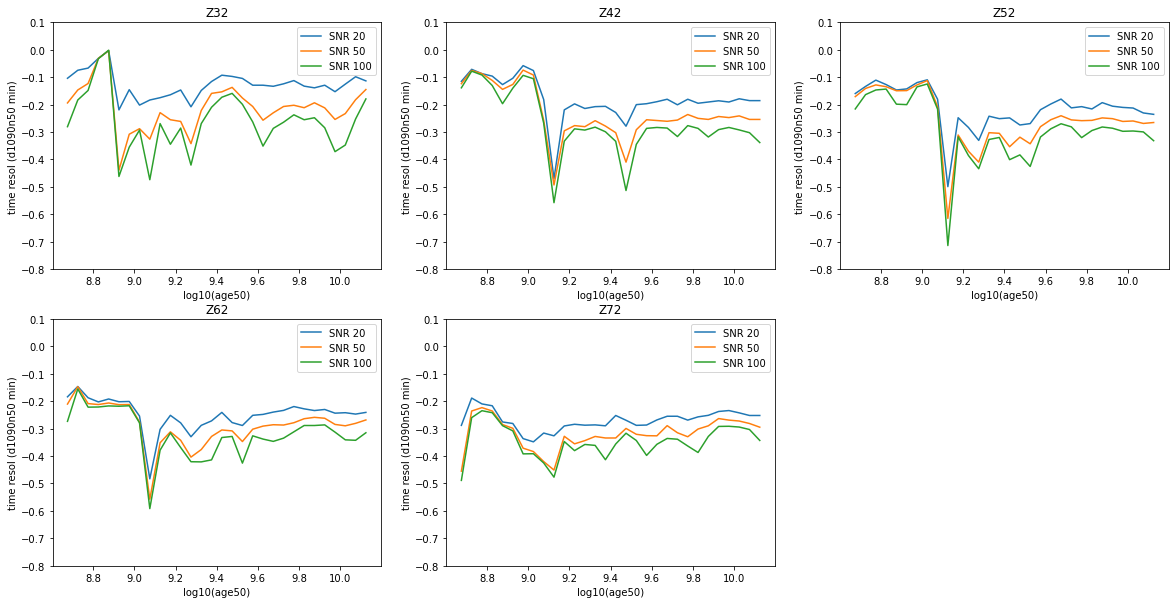

In [23]:
fig, axs=plt.subplots(2,3, figsize=(20,10))
axs[1,2].axis('off')

axs[0,0].plot(age50_binned, t_32_tot, label='SNR 20')
axs[0,0].plot(age50_binned, t_32_tot50, label='SNR 50')
axs[0,0].plot(age50_binned, t_32_tot100, label='SNR 100')
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Z32')
axs[0,0].set_ylim([-0.8, 0.1])
axs[0,0].set_xlabel('log10(age50)')
axs[0,0].set_ylabel('time resol (d1090n50 min)')

axs[0,1].plot(age50_binned, t_42_tot, label='SNR 20')
axs[0,1].plot(age50_binned, t_42_tot50, label='SNR 50')
axs[0,1].plot(age50_binned, t_42_tot100, label='SNR 100')
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('Z42')
axs[0,1].set_ylim([-0.8, 0.1])
axs[0,1].set_xlabel('log10(age50)')
axs[0,1].set_ylabel('time resol (d1090n50 min)')

axs[0,2].plot(age50_binned, t_52_tot, label='SNR 20')
axs[0,2].plot(age50_binned, t_52_tot50, label='SNR 50')
axs[0,2].plot(age50_binned, t_52_tot100, label='SNR 100')
axs[0,2].legend(loc='upper right')
axs[0,2].set_title('Z52')
axs[0,2].set_ylim([-0.8, 0.1])
axs[0,2].set_xlabel('log10(age50)')
axs[0,2].set_ylabel('time resol (d1090n50 min)')

axs[1,0].plot(age50_binned, t_62_tot, label='SNR 20')
axs[1,0].plot(age50_binned, t_62_tot50, label='SNR 50')
axs[1,0].plot(age50_binned, t_62_tot100, label='SNR 100')
axs[1,0].legend(loc='upper right')
axs[1,0].set_title('Z62')
axs[1,0].set_ylim([-0.8, 0.1])
axs[1,0].set_xlabel('log10(age50)')
axs[1,0].set_ylabel('time resol (d1090n50 min)')

axs[1,1].plot(age50_binned, t_72_tot, label='SNR 20')
axs[1,1].plot(age50_binned, t_72_tot50, label='SNR 50')
axs[1,1].plot(age50_binned, t_72_tot100, label='SNR 100')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Z72')
axs[1,1].set_ylim([-0.8, 0.1])
axs[1,1].set_xlabel('log10(age50)')
axs[1,1].set_ylabel('time resol (d1090n50 min)')